*Eduardus Tjitrahardja | @edutjie | 2022*

# Backforward Propagation - Learning Rate

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

%matplotlib inline

plt.style.use('seaborn')

## Generating Dataset

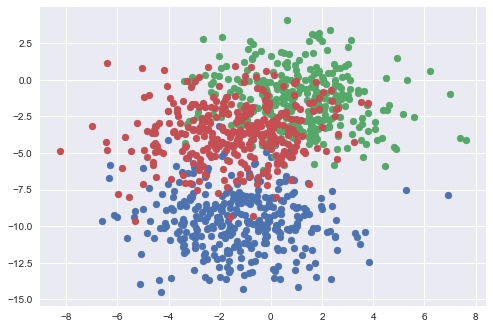

In [13]:
# generate 2d classification datasets
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# scatter plot for each class value
for class_value in range(3):
    
    # select indices of points with the class label
    row_ix = np.where(y == class_value)
    # scatter plot for points with a different color
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
# show plot
plt.show()

In [14]:
# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500

X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

## Creating a Simple MLP Model

In [15]:
# fit a model and plot learning curve
def fit_model(X_train, y_train, X_test, y_test, lrate):
    
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = SGD(lr=lrate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('lrate='+str(lrate))
    plt.legend()

## Applying Learning Rate

d:\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


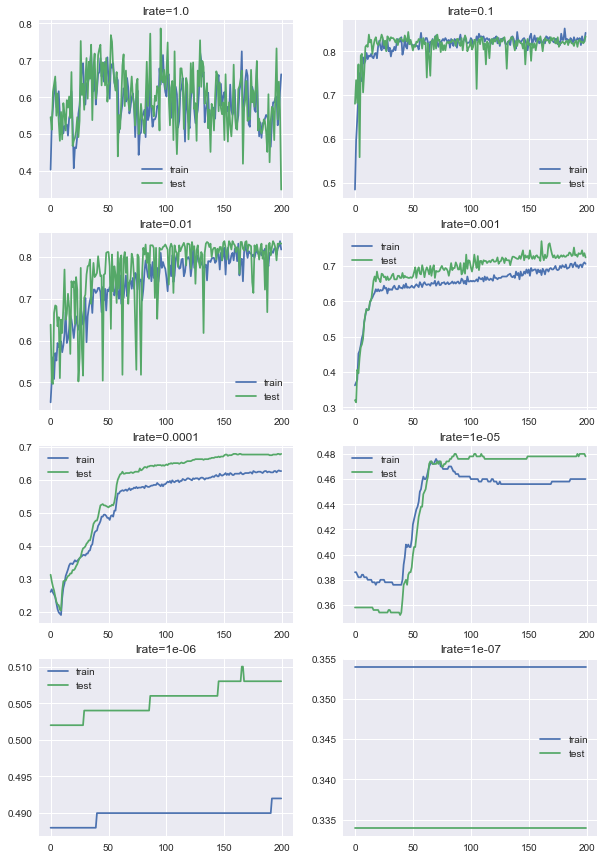

In [16]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7] # use learning rate values between 0.0 to 1.0

plt.figure(figsize=(10, 15))
for i in range(len(learning_rates)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(X_train, y_train, X_test, y_test, learning_rates[i])

# show learning curves
plt.show()

## Aplying Momentum (lr=0.01)

In [17]:
# fit a model and plot learning curve
def fit_model_with_momentum(X_train, y_train, X_test, y_test, momentum):
    
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.01, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('momentum='+str(momentum))
    plt.legend()

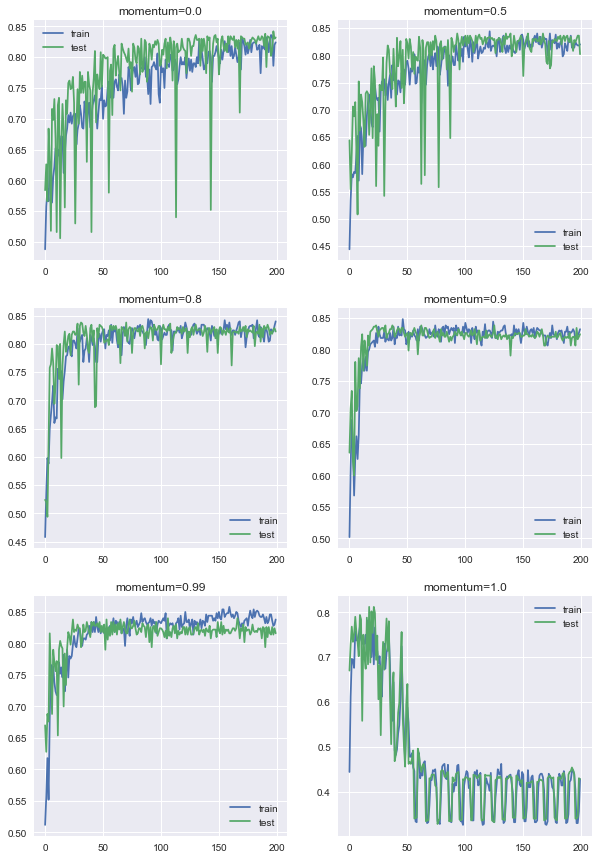

In [18]:
# create learning curves for different momentums
momentums = [0.0, 0.5, 0.8, 0.9, 0.99, 1.0] # use momentum values close to 1.0

plt.figure(figsize=(10, 15))
for i in range(len(momentums)):
    
    # determine the plot number
    plot_no = 320 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model_with_momentum(X_train, y_train, X_test, y_test, momentums[i])

# show learning curves
plt.show()